<a href="https://colab.research.google.com/github/jijan67/Weather-Classification-System-Using-EfficientNetB3/blob/main/Weather_Classification_System_Using_EfficientNetB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from PIL import Image
import itertools

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

print('Modules loaded successfully')

Modules loaded successfully


In [ ]:
import os
import pandas as pd


data_dir = '/content/drive/MyDrive/OurDataset'

filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    pics = os.listdir(foldpath)
    for pic in pics:
        pic_path = os.path.join(foldpath, pic)
        filepaths.append(pic_path)
        labels.append(fold)


FSeries = pd.Series(filepaths, name='Pic Path')
LSeries = pd.Series(labels, name='Labels')

df = pd.concat([FSeries, LSeries], axis=1)


In [ ]:
df

Pic Path Labels
0        /content/drive/MyDrive/OurDataset/Sunny/1.JPG  Sunny
1        /content/drive/MyDrive/OurDataset/Sunny/2.JPG  Sunny
2        /content/drive/MyDrive/OurDataset/Sunny/3.JPG  Sunny
3        /content/drive/MyDrive/OurDataset/Sunny/4.JPG  Sunny
4        /content/drive/MyDrive/OurDataset/Sunny/5.JPG  Sunny
..                                                 ...    ...
246  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
247  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
248  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
249  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
250  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow

[251 rows x 2 columns]

In [ ]:
train_df, dummy_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Labels'])
test_df,  valid_df= train_test_split(dummy_df, test_size=0.1, random_state=42, stratify=dummy_df['Labels'])

In [ ]:
train_df

Pic Path Labels
57      /content/drive/MyDrive/OurDataset/Sunny/58.JPG  Sunny
65   /content/drive/MyDrive/OurDataset/Rain/2024021...   Rain
1        /content/drive/MyDrive/OurDataset/Sunny/2.JPG  Sunny
138       /content/drive/MyDrive/OurDataset/Fog/16.JPG    Fog
123  /content/drive/MyDrive/OurDataset/Fog/Capture.JPG    Fog
..                                                 ...    ...
34      /content/drive/MyDrive/OurDataset/Sunny/35.JPG  Sunny
92       /content/drive/MyDrive/OurDataset/Rain/10.JPG   Rain
204  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
21      /content/drive/MyDrive/OurDataset/Sunny/22.JPG  Sunny
29      /content/drive/MyDrive/OurDataset/Sunny/30.JPG  Sunny

[175 rows x 2 columns]

In [ ]:
test_df

Pic Path Labels
23      /content/drive/MyDrive/OurDataset/Sunny/24.JPG  Sunny
145       /content/drive/MyDrive/OurDataset/Fog/23.JPG    Fog
104      /content/drive/MyDrive/OurDataset/Rain/22.JPG   Rain
86        /content/drive/MyDrive/OurDataset/Rain/4.JPG   Rain
221  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
..                                                 ...    ...
66   /content/drive/MyDrive/OurDataset/Rain/2024021...   Rain
161       /content/drive/MyDrive/OurDataset/Fog/39.JPG    Fog
58      /content/drive/MyDrive/OurDataset/Sunny/59.JPG  Sunny
89        /content/drive/MyDrive/OurDataset/Rain/7.JPG   Rain
240  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow

[68 rows x 2 columns]

In [ ]:
valid_df

Pic Path Labels
172       /content/drive/MyDrive/OurDataset/Fog/50.JPG    Fog
40      /content/drive/MyDrive/OurDataset/Sunny/41.JPG  Sunny
233  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
107      /content/drive/MyDrive/OurDataset/Rain/25.JPG   Rain
208  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
74   /content/drive/MyDrive/OurDataset/Rain/2024021...   Rain
5        /content/drive/MyDrive/OurDataset/Sunny/6.JPG  Sunny
124        /content/drive/MyDrive/OurDataset/Fog/2.JPG    Fog

In [ ]:
test_df.sample(10)

Pic Path Labels
234  /content/drive/MyDrive/OurDataset/Snow/2024032...   Snow
125        /content/drive/MyDrive/OurDataset/Fog/3.JPG    Fog
110      /content/drive/MyDrive/OurDataset/Rain/28.JPG   Rain
66   /content/drive/MyDrive/OurDataset/Rain/2024021...   Rain
189  /content/drive/MyDrive/OurDataset/Snow/2024021...   Snow
158       /content/drive/MyDrive/OurDataset/Fog/36.JPG    Fog
94       /content/drive/MyDrive/OurDataset/Rain/12.JPG   Rain
62   /content/drive/MyDrive/OurDataset/Rain/2024021...   Rain
7        /content/drive/MyDrive/OurDataset/Sunny/8.JPG  Sunny
95       /content/drive/MyDrive/OurDataset/Rain/13.JPG   Rain

In [ ]:
batch_size = 16
img_size = (224, 224)

gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe(train_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = True,
                                   batch_size= batch_size)

test_gen = gen.flow_from_dataframe(test_df, x_col='Pic Path', y_col='Labels',target_size= img_size,
                                   class_mode= 'categorical', color_mode='rgb', shuffle = False,
                                   batch_size= batch_size)

Found 175 validated image filenames belonging to 4 classes.
Found 8 validated image filenames belonging to 4 classes.
Found 68 validated image filenames belonging to 4 classes.


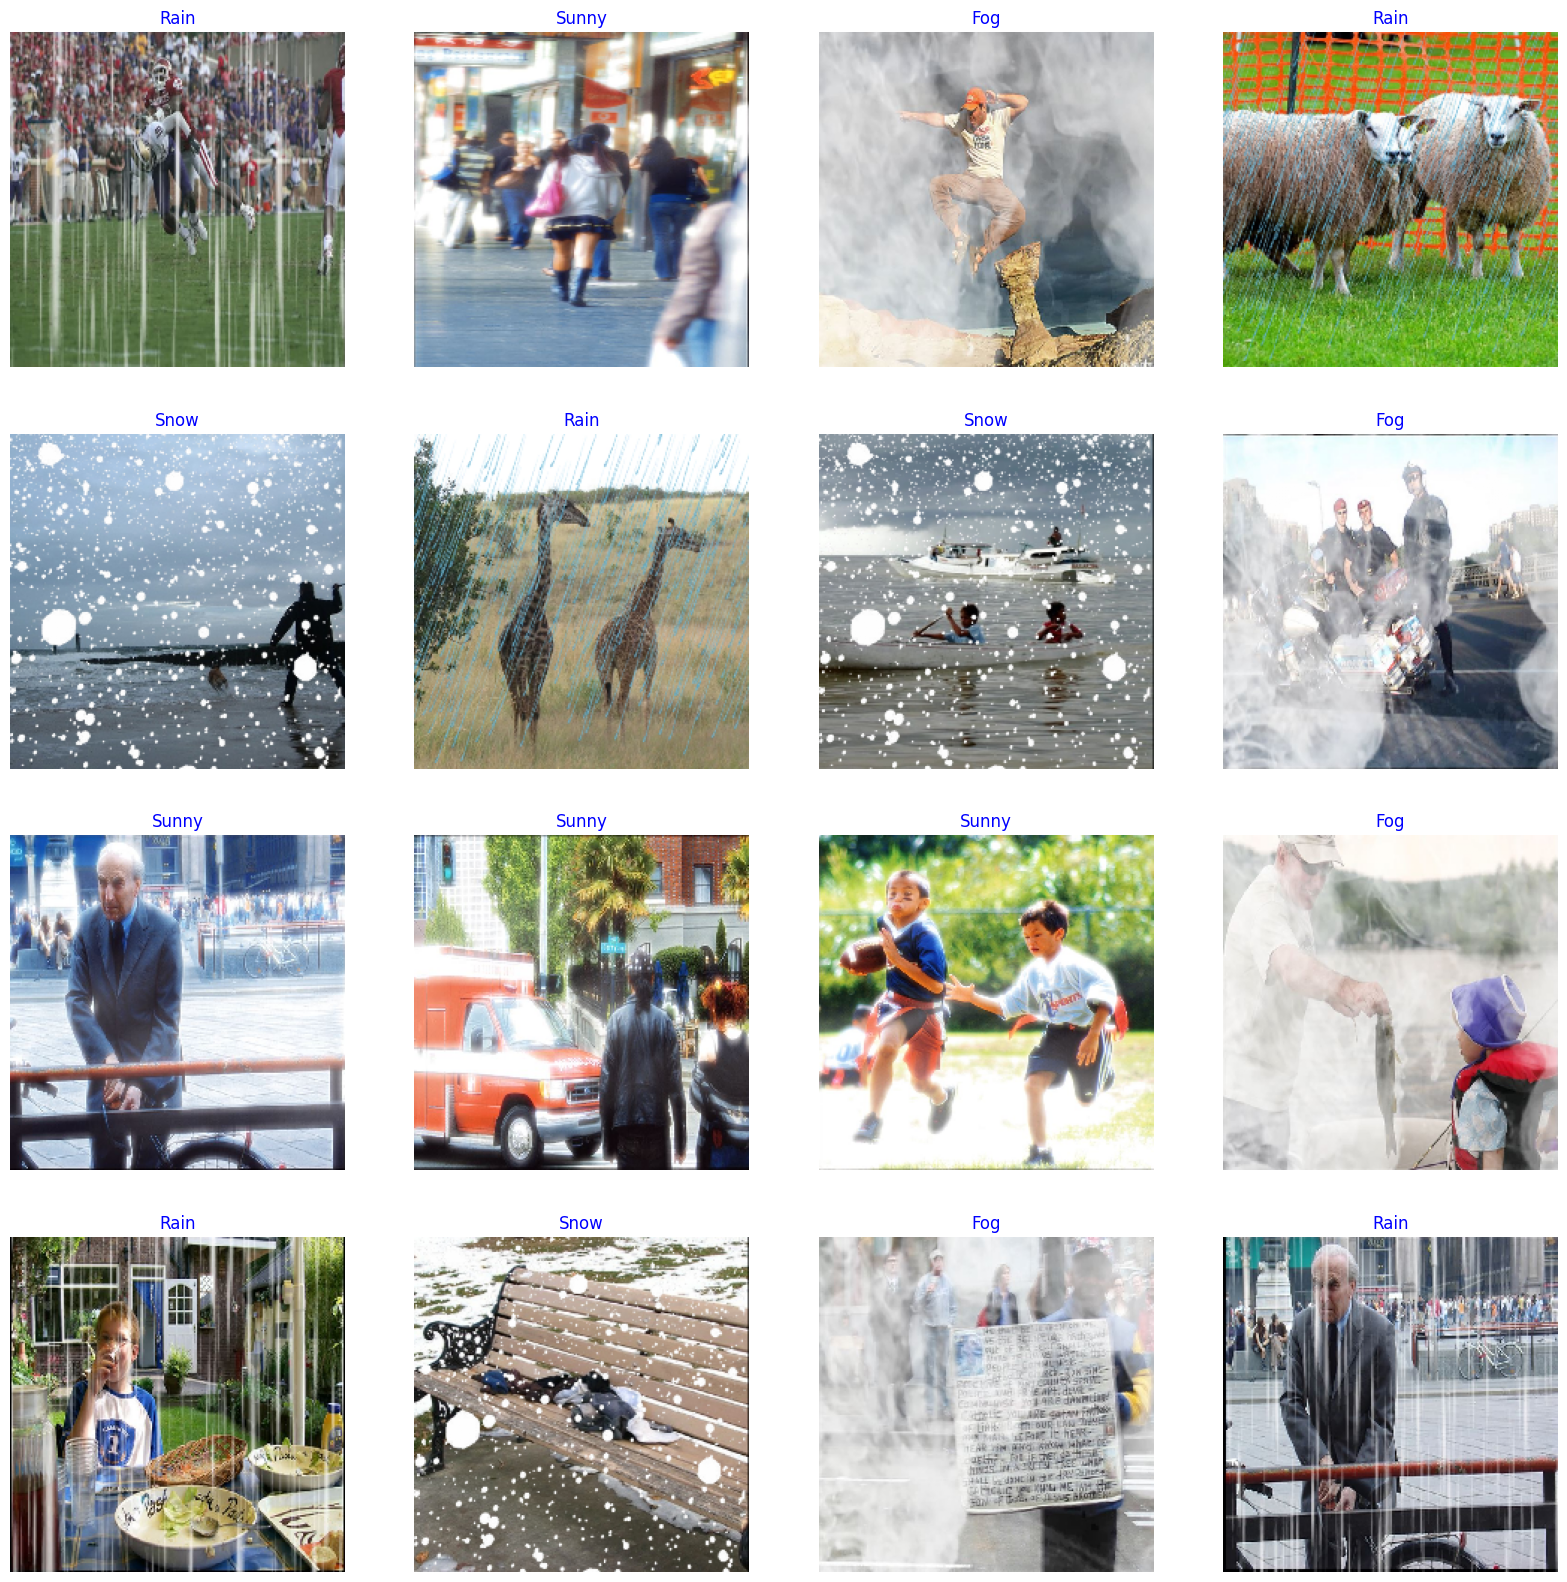

In [ ]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys()))

base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet",
                                                               input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy',
              metrics= ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),
                        tf.keras.metrics.AUC()])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                         

In [ ]:
epochs = 25

hist = model.fit(train_gen, epochs = epochs, verbose = 1, validation_data = valid_gen, shuffle = False)

Epoch 1/25
11/11 [==============================] - 171s 11s/step - loss: 9.2315 - accuracy: 0.5371 - precision: 0.5658 - recall: 0.4914 - auc: 0.7641 - val_loss: 12.3053 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 0.5000 - val_auc: 0.7031
Epoch 2/25
11/11 [==============================] - 4s 363ms/step - loss: 7.9423 - accuracy: 0.9200 - precision: 0.9298 - recall: 0.9086 - auc: 0.9804 - val_loss: 9.5404 - val_accuracy: 0.7500 - val_precision: 0.7500 - val_recall: 0.7500 - val_auc: 0.8854
Epoch 3/25
11/11 [==============================] - 3s 273ms/step - loss: 7.6583 - accuracy: 0.9429 - precision: 0.9647 - recall: 0.9371 - auc: 0.9930 - val_loss: 8.8973 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9010
Epoch 4/25
11/11 [==============================] - 4s 302ms/step - loss: 7.4251 - accuracy: 0.9600 - precision: 0.9766 - recall: 0.9543 - auc: 0.9971 - val_loss: 7.9975 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 

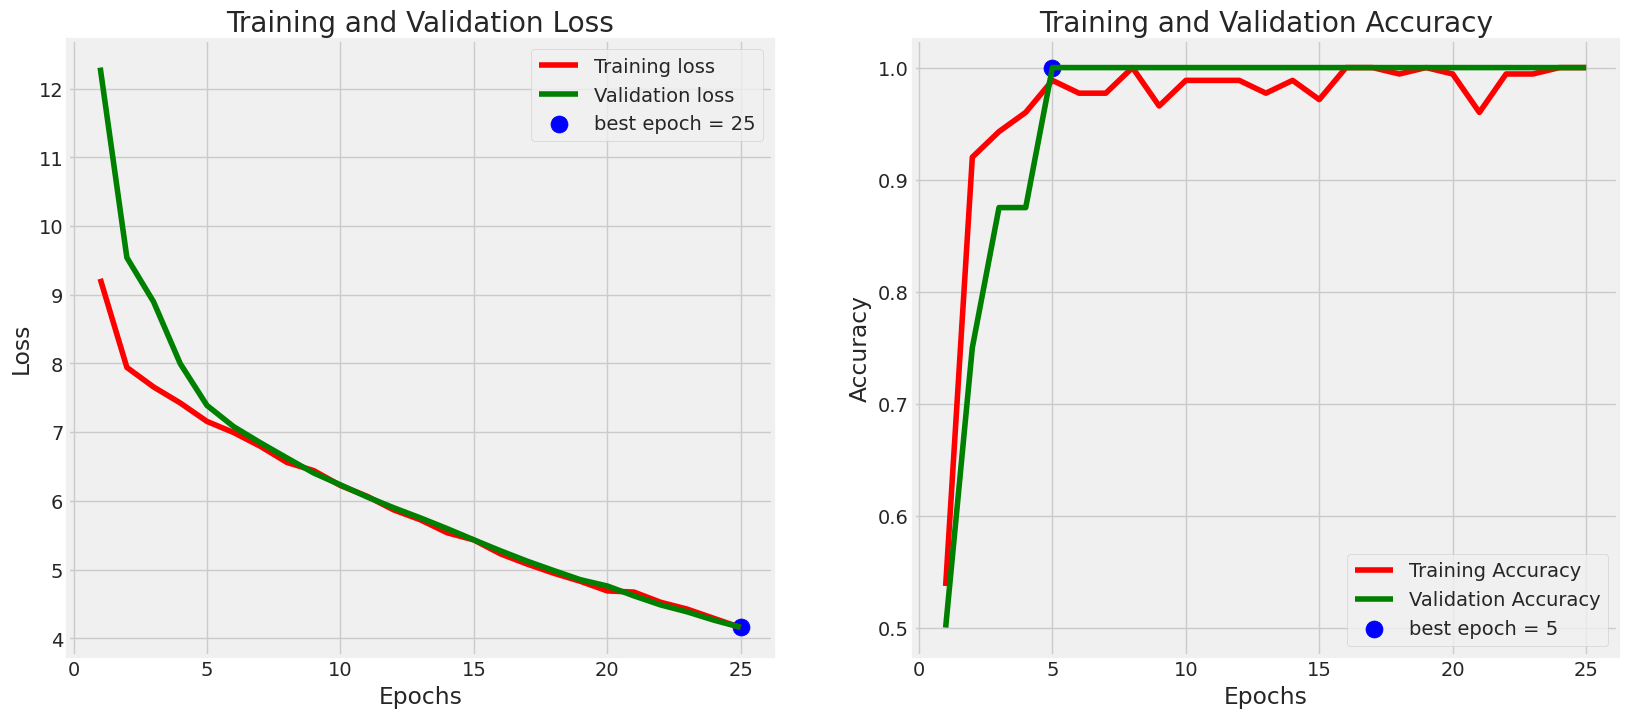

In [ ]:
# Define needed variables

tr_acc = hist.history['accuracy']
tr_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch = {str(index_loss + 1)}'
acc_label = f'best epoch = {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label = 'Training loss')
plt.plot(Epochs, val_loss, 'g', label = 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

5/5 [==============================] - 30s 7s/step - loss: 4.1730 - accuracy: 0.9853 - precision: 1.0000 - recall: 0.9853 - auc: 0.9998


In [ ]:
print('Train Loss : ', train_score[0])
print('Train Accuracy : ', train_score[1])
print('=' * 20)
print( )
print('Valid Loss : ', valid_score[0])
print('Valid Accuracy : ', valid_score[1])
print('=' * 20)
print( )
print('Test Loss : ', test_score[0])
print('Test Accuracy : ', test_score[1])

Train Loss :  4.132152080535889
Train Accuracy :  1.0

Valid Loss :  4.161181449890137
Valid Accuracy :  1.0

Test Loss :  4.172969818115234
Test Accuracy :  0.9852941036224365


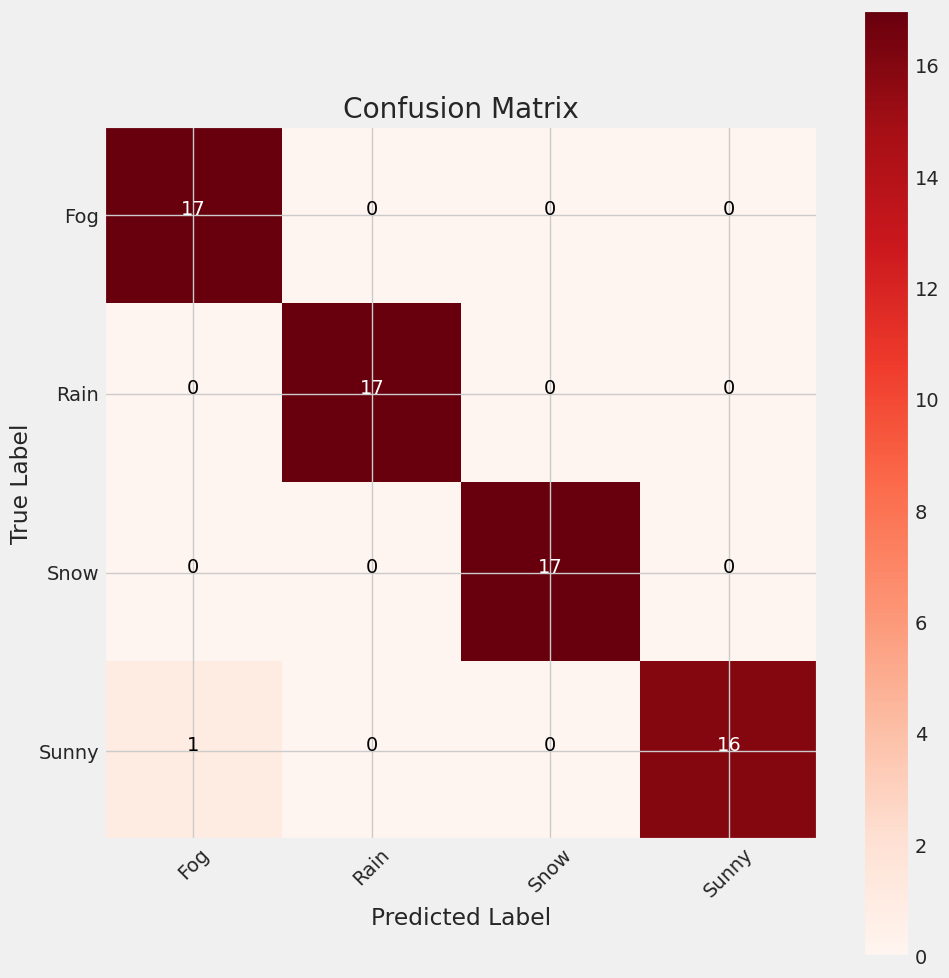

In [ ]:
preds = model.predict_generator(test_gen)
y_pred= np.argmax(preds,axis=1)

g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #(5,5)
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

         Fog       0.94      1.00      0.97        17
        Rain       1.00      1.00      1.00        17
        Snow       1.00      1.00      1.00        17
       Sunny       1.00      0.94      0.97        17

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0.99      0.99      0.99        68

